In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

In [2]:
X, Y = make_circles(n_samples=1500, noise=0.05)

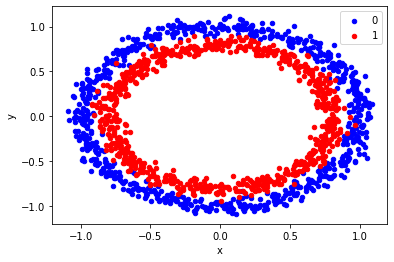

In [3]:
df = pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=Y))
colors = {0: 'blue', 1:'red'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [4]:
y = df.iloc[:, 2]
x = df.iloc[:, 0:2]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1350, 2) (150, 2) (1350,) (150,)


تا اینجا دایره‌هایی شامل ۱۰۰۰ نود با نرخ نویز ۰.۰۵ تشکیل دادیم

In [6]:
ann1 = tf.keras.models.Sequential()
ann1.add(tf.keras.layers.Dense(units=8, activation=None))
ann1.add(tf.keras.layers.Dense(units=16, activation=None))
ann1.add(tf.keras.layers.Dense(units=1, activation=None))

In [7]:
ann1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1 = ann1.fit(x_train, y_train, batch_size=16, epochs=200)

Epoch 1/200
85/85 [==============================] - 1s 2ms/step - loss: 4.0092 - accuracy: 0.4644
Epoch 2/200
85/85 [==============================] - 0s 2ms/step - loss: 1.4144 - accuracy: 0.4837
Epoch 3/200
85/85 [==============================] - 0s 2ms/step - loss: 0.7236 - accuracy: 0.4926
Epoch 4/200
85/85 [==============================] - 0s 2ms/step - loss: 0.7049 - accuracy: 0.5007
Epoch 5/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4896
Epoch 6/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4970
Epoch 7/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4985
Epoch 8/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4733
Epoch 9/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 10/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5044
Epoch 11/

In [8]:
y_pred1 = ann1.predict(x_test)

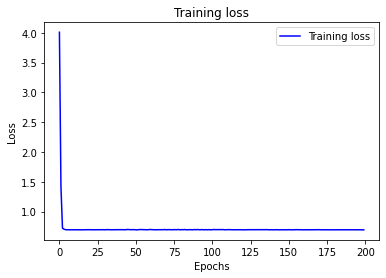

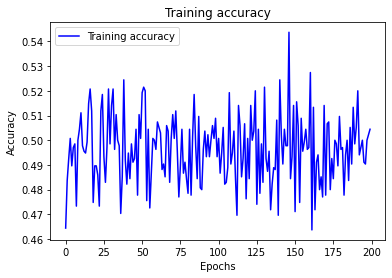

In [9]:
plt.plot(model1.epoch, model1.history["loss"], 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(model1.epoch, model1.history["accuracy"], 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
counter = 0
correct = 0
for i in range(len(y_pred1)):
  if (y_pred1[i][0] <= 0.5 and y_test.values[i]==0) or (y_pred1[i][0] >= 0.5 and y_test.values[i]==1):
    correct += 1
  counter += 1
print(correct/counter)

0.43333333333333335


شبکه عصبی را بدون استفاده از تابع فعال ساز تشکیل دادیم. می‌بینیم که صحت عملکرد برروی داده‌های تست حدود ۴۳ درصد است و خیلی خوب نتوانسته عمل کند چراکه نبود تابع فعال ساز باعث می‌شود انعطاف پذیری مدل کم باشد و نتواند به طور مناسب یادگیری و دسته‌بندی را انجام دهد. هم‌چنین با بررسی نمودارها می‌بینیم که با افزایش ایپاک‌ها  روند مثبتی در عملکرد مدل وجود ندارد 

Epoch 1/200
85/85 [==============================] - 1s 2ms/step - loss: 2.8626 - accuracy: 0.4615
Epoch 2/200
85/85 [==============================] - 0s 2ms/step - loss: 0.7067 - accuracy: 0.4296
Epoch 3/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4667
Epoch 4/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4689
Epoch 5/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5089
Epoch 6/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4941
Epoch 7/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5015
Epoch 8/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 9/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4970
Epoch 10/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4970
Epoch 11/

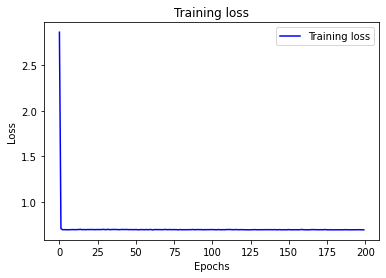

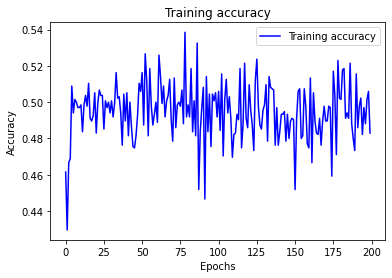

In [11]:
ann2 = tf.keras.models.Sequential()
ann2.add(tf.keras.layers.Dense(units=8, activation='linear'))
ann2.add(tf.keras.layers.Dense(units=16, activation='linear'))
ann2.add(tf.keras.layers.Dense(units=1, activation='linear'))

ann2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2 = ann2.fit(x_train, y_train, batch_size=16, epochs=200)

y_pred2 = ann2.predict(x_test)

plt.plot(model2.epoch, model2.history["loss"], 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(model2.epoch, model2.history["accuracy"], 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
counter = 0
correct = 0
for i in range(len(y_pred2)):
  if (y_pred2[i][0] <= 0.5 and y_test.values[i]==0) or (y_pred2[i][0] >= 0.5 and y_test.values[i]==1):
    correct += 1
  counter += 1
print(correct/counter)

0.44


در این مرحله از تابع فعال‌ساز خطی استفاده کردیم که باز هم عملکرد خیلی خوبی نشان نمی‌دهد چراکه توزیع و جنس داده‌های ما به صورتی نیست که با فعال‌ساز خطی بتوان دسته‌بندی را خوب انجام داد

Epoch 1/200
85/85 [==============================] - 1s 2ms/step - loss: 0.2476 - accuracy: 0.4985
Epoch 2/200
85/85 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.5126
Epoch 3/200
85/85 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.5681
Epoch 4/200
85/85 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.6178
Epoch 5/200
85/85 [==============================] - 0s 2ms/step - loss: 0.2395 - accuracy: 0.6489
Epoch 6/200
85/85 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.7030
Epoch 7/200
85/85 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.7348
Epoch 8/200
85/85 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.7585
Epoch 9/200
85/85 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.8059
Epoch 10/200
85/85 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.8393
Epoch 11/

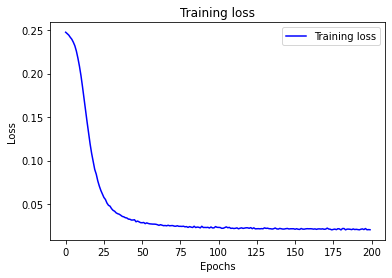

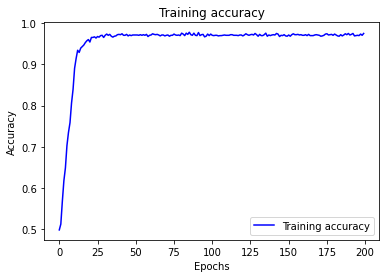

In [16]:
ann3 = tf.keras.models.Sequential()
ann3.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann3.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model3 = ann3.fit(x_train, y_train, batch_size=16, epochs=200)

y_pred3 = ann3.predict(x_test)

plt.plot(model3.epoch, model3.history["loss"], 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(model3.epoch, model3.history["accuracy"], 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
counter = 0
correct = 0
for i in range(len(y_pred3)):
  if (y_pred3[i][0] <= 0.5 and y_test.values[i]==0) or (y_pred3[i][0] >= 0.5 and y_test.values[i]==1):
    correct += 1
  counter += 1
print(correct/counter)

0.9733333333333334


حال با اعمال تابع ضرر جدید و تابع فعال‌ساز غیرخطی رلو برای لایه داخلی و فعال‌ساز سیگموید برای لایه خروجی که عملکرد غیرخطی می‌دهد؛ می‌بینیم مدل در برابر داده‌های تست عملکرد ۹۷ درصدی از خود نشان می‌دهد که نتیجه‌ی قابل توجهی در برابر مراحل قبلی است. علت هم این است که باتوجه به داده‌هایمان و توزیع‌شان این توابع یادگیری انعطاف‌پذیر و خوبی به مدل می‌دهند. هم‌چنین روند تغییرات ضرر و افزایش صحت عملکرد در نمودارها قابل دریافت است  

Epoch 1/200
85/85 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5052
Epoch 2/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5111
Epoch 3/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5259
Epoch 4/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5333
Epoch 5/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5874
Epoch 6/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6052
Epoch 7/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.6244
Epoch 8/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6037
Epoch 9/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5793
Epoch 10/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6207
Epoch 11/

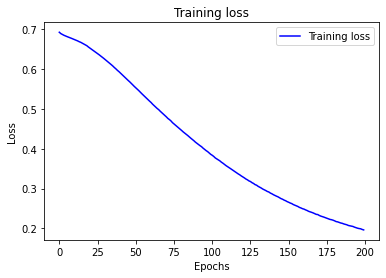

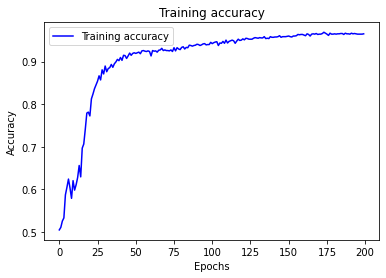

In [17]:
ann4 = tf.keras.models.Sequential()
ann4.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann4.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4 = ann4.fit(x_train, y_train, batch_size=16, epochs=200)

y_pred4 = ann4.predict(x_test)

plt.plot(model4.epoch, model4.history["loss"], 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(model4.epoch, model4.history["accuracy"], 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
counter = 0
correct = 0
for i in range(len(y_pred4)):
  if (y_pred4[i][0] <= 0.5 and y_test.values[i]==0) or (y_pred4[i][0] >= 0.5 and y_test.values[i]==1):
    correct += 1
  counter += 1
print(correct/counter)

0.9733333333333334


در این مرحله با قرار دادن تنها یک لایه پنهان اما استفاده از تابع فعال‌ساز غیرخطی می‌بینیم باز هم مدل عملکرد خوبی دارد و دسته‌بندی را به طور مناسبی انجام داده است. و در برابر داده‌های تست با صحت بالایی عمل کرده. در نمودار روند تغییرات زیان با اقزایش ایپاک‌ها می‌بینیم که نسبت به حالت قبلی دیرتر به حالت هدف نزدیک می‌شود و علتش لایه‌های کم‌تر و متقابلا سرعت و توانایی یادگیری کم‌تر می‌باشد. در خصوص صحت عملکرد هم همینطور کمی دیرتر از حالت قبل همگرا می‌شود

In [20]:
my_optimizer = tf.keras.optimizers.Adam(0.001)
my_optimizer.learning_rate.assign(0.01)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.01>

Epoch 1/200
85/85 [==============================] - 1s 2ms/step - loss: 0.6736 - accuracy: 0.5867
Epoch 2/200
85/85 [==============================] - 0s 2ms/step - loss: 0.5370 - accuracy: 0.7889
Epoch 3/200
85/85 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8985
Epoch 4/200
85/85 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.9356
Epoch 5/200
85/85 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9585
Epoch 6/200
85/85 [==============================] - 0s 2ms/step - loss: 0.1319 - accuracy: 0.9556
Epoch 7/200
85/85 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9526
Epoch 8/200
85/85 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.9548
Epoch 9/200
85/85 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.9607
Epoch 10/200
85/85 [==============================] - 0s 2ms/step - loss: 0.1063 - accuracy: 0.9607
Epoch 11/

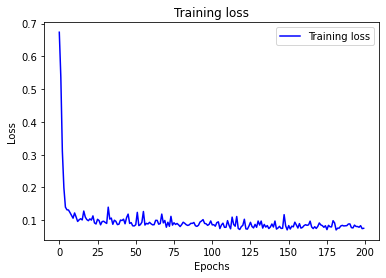

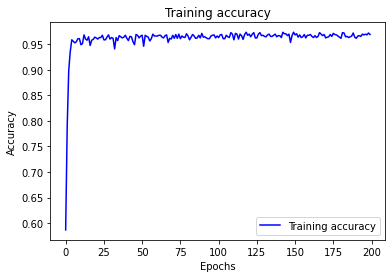

In [21]:
ann5 = tf.keras.models.Sequential()
ann5.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann5.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann5.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann5.compile(optimizer=my_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model5 = ann5.fit(x_train, y_train, batch_size=16, epochs=200)

y_pred5 = ann5.predict(x_test)

plt.plot(model5.epoch, model5.history["loss"], 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(model5.epoch, model5.history["accuracy"], 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
counter = 0
correct = 0
for i in range(len(y_pred5)):
  if (y_pred5[i][0] <= 0.5 and y_test.values[i]==0) or (y_pred5[i][0] >= 0.5 and y_test.values[i]==1):
    correct += 1
  counter += 1
print(correct/counter)

0.9666666666666667


در این بخش نرخ یادگیری را ۰.۰۱ قرار دادیم و به صورت دستی تنظیم کردیم. از تابع‌ّای فعال ساز رلو برای لایه‌های داخلی و سیگموید برای لایه نهایی استفاده کردیم و عملکرد مناسب ۹۶ درصدی را دریافت کردیم. علت اینکه عملکرد از بخش‌های قبلی بهتر نشده این است که در بخش‌های قبل از بهینه‌ساز و تنظیم‌کننده پارامتر‌های آدام استفاده می‌کردیم که به صورت هوشمند و بهتر از ما می‌تواند پارامترها را بهینه کند

Epoch 1/200
85/85 [==============================] - 1s 2ms/step - loss: 0.2310 - accuracy: 0.6237
Epoch 2/200
85/85 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.8548
Epoch 3/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9304
Epoch 4/200
85/85 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9504
Epoch 5/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9526
Epoch 6/200
85/85 [==============================] - 0s 4ms/step - loss: 0.0383 - accuracy: 0.9481
Epoch 7/200
85/85 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.9593
Epoch 8/200
85/85 [==============================] - 1s 7ms/step - loss: 0.0306 - accuracy: 0.9585
Epoch 9/200
85/85 [==============================] - 0s 5ms/step - loss: 0.0309 - accuracy: 0.9607
Epoch 10/200
85/85 [==============================] - 0s 4ms/step - loss: 0.0289 - accuracy: 0.9622
Epoch 11/

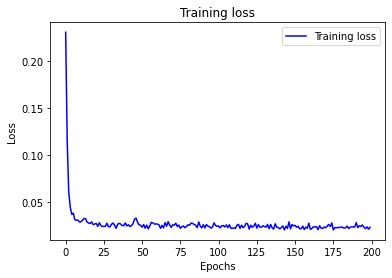

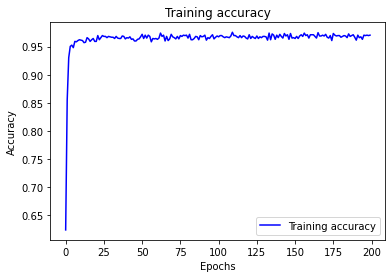

In [25]:
ann6 = tf.keras.models.Sequential()
ann6.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann6.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann6.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann6.compile(optimizer=my_optimizer, loss='mean_squared_error', metrics=['accuracy'])
model6 = ann6.fit(x_train, y_train, batch_size=16, epochs=200)

y_pred6 = ann6.predict(x_test)

plt.plot(model6.epoch, model6.history["loss"], 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(model6.epoch, model6.history["accuracy"], 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
counter = 0
correct = 0
for i in range(len(y_pred6)):
  if (y_pred6[i][0] <= 0.5 and y_test.values[i]==0) or (y_pred6[i][0] >= 0.5 and y_test.values[i]==1):
    correct += 1
  counter += 1
print(correct/counter)

0.98


در بخش آخر هم از توابع فعال‌ساز غیرخطی رلو برای لایه‌های داخلی و سیگموید برای لایه پایانی استفاده کردیم چراکه همانطور که در بخش‌های قبل دیدیم عملکرد بهتری باتوجه به جنس و توزیع داده‌هایمان دارند. از بهینه‌ساز آدام استفاده کردیم که به صورت هوشمند پارامترها و نرخ یادگیری را تنظیم و بهینه می‌کند. از تابع زیان مناسب هم استفاده کردیم که مجموعا عملکرد ۹۸ درصدی به ما داده و از بخش‌های قبل هم بهتر عمل کرده‌است